## Case Study 
# Covid-19 Part I: Data Extraction and Cleaning

New concepts

* Detailed inspection and manipulation of data types in imported data
* Introducing time-series data
* Debugging data issues
* Dealing with invalid entries
* Type infernce and downcasting
* Saving structured data

Reinforced concepts

* File IO with pandas
* File formats
* Data/object types
* Data selection and manipulation with pandas (.loc, .iloc, etc)
* Using list comprehensions
* Plotting data directly from pandas

## Finding a Reliable Covid-19 Data Source

There are many possible sources of data (of varying quality and veracity). We always look for a trusted source of data, such as the World Health Organisation (WHO).

Academics from the Center for Systems Science and Engineering (CSSE) at John Hopkins University have done a good job of collating data from reliable sources (including WHO) and making it publicly available as a "[dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)". Note that the data sources (as well as a short article in the Journal [_Lancet_](https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub)) are provided at the bottom of the page.

The authors also provide a link to the data sources on [Github](https://github.com/CSSEGISandData/COVID-19). The data is shared and downloadable.

(This is an example of best practice in sharing and documenting data for the common good!)

We also make use of data sourced from JHU CSSE and combined and packaged at [DataHub.io](https://datahub.io/core/covid-19).

### Data inspection

The package downloaded from Github contains the following files:

```
datapackage.json
process.py
README.md
time-series-19-covid-combined.csv
```

> _Q: What types are they and what do you anticipate they will contain?_

Lets look at them in a terminal and see if we're right &rarr;

Jupyter Lab can handle all of these file types, so lets take a closer look using Jupyter Lab &rarr;

Lets use some of our skills learnt so far to read in the data, inspect it more closely, and extract the data we're interested in.

## Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

We'll start with the csv data file for 22nd March.

In [2]:
COVID_DATA="Data/2020-03-22-time-series-19-covid-combined.csv"
data = pd.read_csv(COVID_DATA)
data

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,NaN,15.0000,101.0000,2,0,0
1,2020-01-23,Thailand,NaN,15.0000,101.0000,3,0,0
2,2020-01-24,Thailand,NaN,15.0000,101.0000,5,0,0
3,2020-01-25,Thailand,NaN,15.0000,101.0000,7,0,0
4,2020-01-26,Thailand,NaN,15.0000,101.0000,8,2,0
...,...,...,...,...,...,...,...,...
29702,2020-03-18,Timor-Leste,NaN,-8.8742,125.7275,0,0,0
29703,2020-03-19,Timor-Leste,NaN,-8.8742,125.7275,0,0,0
29704,2020-03-20,Timor-Leste,NaN,-8.8742,125.7275,0,0,0
29705,2020-03-21,Timor-Leste,NaN,-8.8742,125.7275,0,0,0


#### Data types

In [5]:
data.dtypes

Date               object
Country/Region     object
Province/State     object
Lat               float64
Long              float64
Confirmed           int64
Recovered           int64
Deaths              int64
dtype: object

The actual data class can vary within the same column. Let's look at two rows - the first row (which happens to be Thailand), and a row of Australian data.

In [6]:
for datum in data.iloc[0]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [7]:
data.loc[data["Country/Region"] == "Australia"].tail(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
24581,2020-03-21,Australia,Australian Capital Territory,-35.4735,149.0124,9,0,0
24582,2020-03-22,Australia,Australian Capital Territory,-35.4735,149.0124,19,0,0


In [8]:
for datum in data.loc[data["Country/Region"] == "Australia"].iloc[0]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


> _Q: How successful has pandas been at inferring data types?_

> _What types would you choose?_

Lets try again. Starting with the province:

Take a look at pandas' [read_csv](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.read_csv.html#pandas.read_csv) documentation.

By default, read_csv picks up missing values (empty strings in this case) and puts in `NaN`. 

This is a good safety feature, but in our case an empty Province/State is perfectly valid. And since NaN is a float, we have a mixture of floats and strings. We would prefer to have the empty strings as per the original data.

We can achieve this by turning off the na_filter:

In [21]:
data = pd.read_csv(COVID_DATA, na_filter=False)
data

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,,15.0000,101.0000,2,0,0
1,2020-01-23,Thailand,,15.0000,101.0000,3,0,0
2,2020-01-24,Thailand,,15.0000,101.0000,5,0,0
3,2020-01-25,Thailand,,15.0000,101.0000,7,0,0
4,2020-01-26,Thailand,,15.0000,101.0000,8,2,0
...,...,...,...,...,...,...,...,...
29702,2020-03-18,Timor-Leste,,-8.8742,125.7275,0,0,0
29703,2020-03-19,Timor-Leste,,-8.8742,125.7275,0,0,0
29704,2020-03-20,Timor-Leste,,-8.8742,125.7275,0,0,0
29705,2020-03-21,Timor-Leste,,-8.8742,125.7275,0,0,0


In [22]:
for datum in data.iloc[0]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


> _Q: What could be a disadvantage of this approach?_

---

What about the Date column?

> _Q: Why is storing date and time information as strings not particularly useful?_



## Introducing Time-series Data

The Date is provided in [ISO 801 format](https://www.iso.org/iso-8601-date-and-time-format.html). Why is this a good format to use?

We could parse the Date string to get out the year, month and day ourselves, but we don't need to.

Pandas is able to parse it, recognise the format, and convert it to its own ("native") timestamp format:

In [8]:
data = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,,15.0,101.0,2,0,0
1,2020-01-23,Thailand,,15.0,101.0,3,0,0
2,2020-01-24,Thailand,,15.0,101.0,5,0,0
3,2020-01-25,Thailand,,15.0,101.0,7,0,0
4,2020-01-26,Thailand,,15.0,101.0,8,2,0


In [9]:
for datum in data.iloc[0]:
    print(type(datum))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [10]:
data.at[0,"Date"]

Timestamp('2020-01-22 00:00:00')

Lets have a look at the documentation for pandas [Timestamp](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.Timestamp.html?highlight=timestamp) &rarr;

Note that in the absence of a specific time, pandas has put in a default time. Why? Is there really any difference between date and time?

There are many ways we can retrieve just the date information:

In [10]:
now = pd.Timestamp.now()
now

Timestamp('2020-04-08 11:28:16.849731')

In [11]:
print(now.day, now.month_name(), now.year)

8 April 2020


(Refresher: Why does `month_name` have parentheses, whereas `day` doesn't? Why might it be done this way?)

In [12]:
now.date()

datetime.date(2020, 4, 8)

The `datetime` module provides many other facilities for viewing and manipulating dates and times.

In [13]:
(now + pd.DateOffset(days=14)).date()

datetime.date(2020, 4, 22)

In [14]:
(now + pd.DateOffset(weeks=2)).date()

datetime.date(2020, 4, 22)

What day does today's date fall on next year?

In [15]:
(now + pd.DateOffset(years=1)).day_name()

'Thursday'

How much work would be required to work these out if we just kept a string representation?

## What If The Data Changes?

It is said that one of the few constants in life is change. This applies to data sources too!

So far so good. We've read in the data, and we've got the data types we want.

A simple way of visualising it is using pandas' plotting functions:

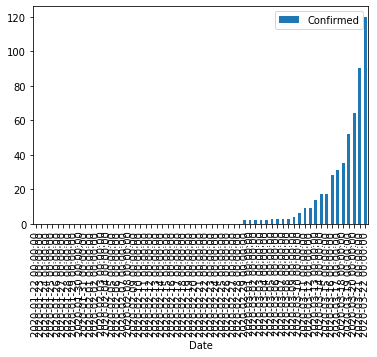

In [16]:
COVID_DATA="Data/2020-03-22-time-series-19-covid-combined.csv"
data = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])

data.loc[data["Province/State"] == "Western Australia"].plot.bar("Date","Confirmed")
plt.show()

👍

Let's see how it's changed the next day!

We just have to change the filename, right?

In [17]:
COVID_DATA="Data/2020-03-23-time-series-19-covid-combined.csv"
data = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])

data.loc[data["Province/State"] == "Western Australia"].plot.bar("Date","Confirmed")
plt.show()

TypeError: no numeric data to plot

Welcome to data science! 🤔

Somebody's changed something in the data. We'll have to find out what, and make our data extraction more robust.

#### Debugging

The error message says there is no numeric data to plot. Why?

First, let's _divide and conquer_ by splitting up Line 4.

In [22]:
isWA = data["Province/State"] == "Western Australia"
WA_data = data.loc[isWA]
WA_data.plot.bar("Date","Confirmed")
plt.show()

TypeError: no numeric data to plot

In [40]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,,15.0,101.0,2,0,0
1,2020-01-23,Thailand,,15.0,101.0,3,0,0
2,2020-01-24,Thailand,,15.0,101.0,5,0,0
3,2020-01-25,Thailand,,15.0,101.0,7,0,0
4,2020-01-26,Thailand,,15.0,101.0,8,2,0


It looks numerical. Let's check.

In [45]:
data.dtypes

Date              datetime64[ns]
Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Confirmed                 object
Recovered                 object
Deaths                    object
dtype: object

Why is Confirmed listed as type `object`?

In [23]:
type(data.at[0,"Confirmed"]) == np.integer

False

In [24]:
type(data.at[0,"Confirmed"])

str

In [25]:
data.at[0,"Confirmed"].isdigit()

True

In [32]:
nums = [datum.isdigit() for datum in data["Confirmed"]] # list comprehension to find numerical rows
nums[:10] # show the first few

[True, True, True, True, True, True, True, True, True, True]

In [33]:
np.all(nums) # are they all like that?

False

In [34]:
data[np.logical_not(nums)] # which ones are not?

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
13019,2020-03-23,US,"Kitsap, WA",47.6477,-122.6413,,,
13081,2020-03-23,US,"Solano, CA",38.3105,-121.9018,,,
13143,2020-03-23,US,"Santa Cruz, CA",37.0454,-121.9580,,,
13205,2020-03-23,US,"Napa, CA",38.5025,-122.2654,,,
13267,2020-03-23,US,"Ventura, CA",34.3705,-119.1391,,,
...,...,...,...,...,...,...,...,...
24613,2020-03-23,US,"Bernalillo, NM",35.0178,-106.6291,,,
24675,2020-03-23,US,"Oakland, MI",42.5922,-83.3362,,,
24737,2020-03-23,US,"Wayne, MI",42.2791,-83.3362,,,
24799,2020-03-23,US,"New Castle, DE",39.5393,-75.6674,,,


Oh.

In [35]:
type(data.at[13019,"Confirmed"])

str

Let's check the raw data &rarr;

> _Q: Why has pandas picked a string type for this data?_

Let's take another look at pandas' [read_csv](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.read_csv.html#pandas.read_csv) documentation &rarr;

Let's try and force the types.

In [36]:
COVID_TIMESERIES_CSV="Data/2020-03-23-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23

dtypes = {
          "Country/Region": 'str',
          "Province/State": 'str',
          "Lat": np.float64,
          "Long": np.float64,
          "Confirmed": np.int64,
          "Recovered": np.int64,
          "Deaths": np.int64
         }
covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"], dtype=dtypes)
covid_csv

ValueError: Integer column has NA values in column 5

Computer says "no"...

In [37]:
np.int64(np.NaN)

ValueError: cannot convert float NaN to integer

More data cleaning needed 🙄

---

### Data cleaning and conversion

Panda's defaults weren't sufficent. We'll read in the data and modify it ourselves.

Start by letting read_csv pick its own types (except the date)...

In [42]:
covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"])
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True) # clean up column names while we're at it
covid_csv

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,NaN,15.0000,101.0,2.0,0.0,0.0
1,2020-01-23,Thailand,NaN,15.0000,101.0,3.0,0.0,0.0
2,2020-01-24,Thailand,NaN,15.0000,101.0,5.0,0.0,0.0
3,2020-01-25,Thailand,NaN,15.0000,101.0,7.0,0.0,0.0
4,2020-01-26,Thailand,NaN,15.0000,101.0,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...
31057,2020-03-19,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31058,2020-03-20,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31059,2020-03-21,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31060,2020-03-22,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0


In [43]:
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed           float64
Recovered           float64
Deaths              float64
dtype: object

In [44]:
[type(datum) for datum in covid_csv.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 float,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

In [45]:
covid_csv.isna()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
31057,False,False,True,False,False,False,False,False
31058,False,False,True,False,False,False,False,False
31059,False,False,True,False,False,False,False,False
31060,False,False,True,False,False,False,False,False


In [46]:
nas = covid_csv.filter(["Confirmed","Recovered","Deaths"]).isna()
nas

,Confirmed,Recovered,Deaths
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31057,False,False,False
31058,False,False,False
31059,False,False,False
31060,False,False,False


In [47]:
nas.any()

Confirmed    True
Recovered    True
Deaths       True
dtype: bool

In [48]:
covid_csv.loc[nas["Confirmed"]]

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
13019,2020-03-23,US,"Kitsap, WA",47.6477,-122.6413,NaN,NaN,NaN
13081,2020-03-23,US,"Solano, CA",38.3105,-121.9018,NaN,NaN,NaN
13143,2020-03-23,US,"Santa Cruz, CA",37.0454,-121.9580,NaN,NaN,NaN
13205,2020-03-23,US,"Napa, CA",38.5025,-122.2654,NaN,NaN,NaN
13267,2020-03-23,US,"Ventura, CA",34.3705,-119.1391,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
24613,2020-03-23,US,"Bernalillo, NM",35.0178,-106.6291,NaN,NaN,NaN
24675,2020-03-23,US,"Oakland, MI",42.5922,-83.3362,NaN,NaN,NaN
24737,2020-03-23,US,"Wayne, MI",42.2791,-83.3362,NaN,NaN,NaN
24799,2020-03-23,US,"New Castle, DE",39.5393,-75.6674,NaN,NaN,NaN


### Invalid data policy

Our _policy_ for missing data will be to:
* accept missing States, set these to the empty string
* accept entries where Recovered or Deaths are empty, and set these to zero
* reject entries where Confirmed cases is empty

`fillna` conveniently handles much of this [&rarr;](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)

In [49]:
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")

Check Recovered and Deaths...

In [50]:
covid_csv.loc[nas["Recovered"]]

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
13019,2020-03-23,US,"Kitsap, WA",47.6477,-122.6413,NaN,0,0
13081,2020-03-23,US,"Solano, CA",38.3105,-121.9018,NaN,0,0
13143,2020-03-23,US,"Santa Cruz, CA",37.0454,-121.9580,NaN,0,0
13205,2020-03-23,US,"Napa, CA",38.5025,-122.2654,NaN,0,0
13267,2020-03-23,US,"Ventura, CA",34.3705,-119.1391,NaN,0,0
...,...,...,...,...,...,...,...,...
24613,2020-03-23,US,"Bernalillo, NM",35.0178,-106.6291,NaN,0,0
24675,2020-03-23,US,"Oakland, MI",42.5922,-83.3362,NaN,0,0
24737,2020-03-23,US,"Wayne, MI",42.2791,-83.3362,NaN,0,0
24799,2020-03-23,US,"New Castle, DE",39.5393,-75.6674,NaN,0,0


Check State...

In [95]:
covid_csv

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,,15.0000,101.0,2.0,0,0
1,2020-01-23,Thailand,,15.0000,101.0,3.0,0,0
2,2020-01-24,Thailand,,15.0000,101.0,5.0,0,0
3,2020-01-25,Thailand,,15.0000,101.0,7.0,0,0
4,2020-01-26,Thailand,,15.0000,101.0,8.0,2,0
...,...,...,...,...,...,...,...,...
31057,2020-03-19,The Gambia,,13.4667,-16.6,0.0,0,0
31058,2020-03-20,The Gambia,,13.4667,-16.6,0.0,0,0
31059,2020-03-21,The Gambia,,13.4667,-16.6,0.0,0,0
31060,2020-03-22,The Gambia,,13.4667,-16.6,0.0,0,0


> _Q: What effect has `downcast` had? How well did pandas infer?_

In [96]:
[type(datum) for datum in covid_csv.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64]

Check for missing values again.

In [51]:
covid_csv.isna().any()

Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed     True
Recovered    False
Deaths       False
dtype: bool

The only column with missing data is now Confirmed. So according to our policy we can now drop all rows with missing data.

In [52]:
covid_csv.dropna(inplace=True)

In [53]:
covid_csv.isna().any()

Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

In [54]:
len(covid_csv)

30870

Do we have the types we want?

In [101]:
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed           float64
Recovered             int64
Deaths                int64
dtype: object

Let's convert Confirmed:

In [55]:
covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64}, copy=False)
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [57]:
[type(datum) for datum in covid_csv.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 numpy.int64]

👍

Let's put it all together, and check that it still works for the March 22nd data...

In [58]:
COVID_TIMESERIES_CSV="Data/2020-03-22-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23
date_start = COVID_TIMESERIES_CSV.find("20") # bit cludgy, should use regex
print("Cleaning timeseries data for", COVID_TIMESERIES_CSV[date_start:date_start+10])

covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"])
print("Reading", len(covid_csv), "rows.")
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)

print("\nMissing data before replacement:")
print(covid_csv.isna().any())
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")

print("\nMissing data after replacement:")
print(covid_csv.isna().any(), "\n")
covid_csv.dropna(inplace=True)
print(len(covid_csv), "rows remaining.\n")

print("Check types:")
covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64})
print(covid_csv.dtypes)

print("\n")
print("Classes:", [type(datum) for datum in covid_csv.iloc[0]])


Cleaning timeseries data for 2020-03-22
Reading 29707 rows.

Missing data before replacement:
Date         False
Country      False
State         True
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

Missing data after replacement:
Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool 

29707 rows remaining.

Check types:
Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


Classes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>]


OK.

What about 24th March?

In [59]:
COVID_TIMESERIES_CSV="Data/2020-03-24-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23
date_start = COVID_TIMESERIES_CSV.find("20") # should use regex for production version
print("Cleaning timeseries data for", COVID_TIMESERIES_CSV[date_start:date_start+10])

covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"])
print("Reading", len(covid_csv), "rows.")
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)

print("\nMissing data before replacement:")
print(covid_csv.isna().any())
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")

print("\nMissing data after replacement:")
print(covid_csv.isna().any(), "\n")
covid_csv.dropna(inplace=True)
print(len(covid_csv), "rows remaining.\n")

print("Check types:")
covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64})
print(covid_csv.dtypes)

print("\n")
print("Classes:", [type(datum) for datum in covid_csv.iloc[0]])


Cleaning timeseries data for 2020-03-24
Reading 15183 rows.

Missing data before replacement:
Date         False
Country      False
State         True
Lat          False
Long         False
Confirmed    False
Recovered     True
Deaths       False
dtype: bool

Missing data after replacement:
Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool 

15183 rows remaining.

Check types:
Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


Classes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>]


Any changes in the data? 

> _Q: Did our code handle it correctly according to our missing data policy?_

## Saving the Cleaned Data

Finally, let's save the cleaned version.

Benefits:
* we can use it in later code or a different programe without having to clean it every time
* if 'back dated' changes are subsequently made to the data, our programs will still work
* we can save it in a structured format, rather than a 'flat file'

We'll save it as structured data, using `json`.

In [60]:
RAW_DATA = "Data/"
CLEAN_DATA = "Cleaned Data/"
TIMESERIES_CSV = "2020-03-24-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23
print("Cleaning timeseries data for", TIMESERIES_CSV[:10])

covid_csv = pd.read_csv(RAW_DATA+TIMESERIES_CSV, parse_dates=["Date"])
print("Reading", len(covid_csv), "rows.")
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)

print("\nMissing data before replacement:")
print(covid_csv.isna().any())
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")

print("\nMissing data after replacement:")
print(covid_csv.isna().any(), "\n")
covid_csv.dropna(inplace=True)
print(len(covid_csv), "rows remaining.\n")

print("Check types:")
covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64})
print(covid_csv.dtypes)

print("\n")
print("Classes:", [type(datum) for datum in covid_csv.iloc[0]], "\n")

covid_csv.to_json(CLEAN_DATA+TIMESERIES_CSV[:-4]+".json")
print("Wrote:", CLEAN_DATA+TIMESERIES_CSV[:-4]+".json")

Cleaning timeseries data for 2020-03-24
Reading 15183 rows.

Missing data before replacement:
Date         False
Country      False
State         True
Lat          False
Long         False
Confirmed    False
Recovered     True
Deaths       False
dtype: bool

Missing data after replacement:
Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool 

15183 rows remaining.

Check types:
Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


Classes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>] 

Wrote: Cleaned Data/2020-03-24-time-series-19-covid-co

Check that worked.

In [61]:
test = pd.read_json("Cleaned Data/2020-03-24-time-series-19-covid-combined.json")
test.head()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,,33.0,65.0,0,0,0
1,2020-01-23,Afghanistan,,33.0,65.0,0,0,0
2,2020-01-24,Afghanistan,,33.0,65.0,0,0,0
3,2020-01-25,Afghanistan,,33.0,65.0,0,0,0
4,2020-01-26,Afghanistan,,33.0,65.0,0,0,0


In [62]:
test.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [63]:
[type(datum) for datum in test.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 numpy.int64]

👍😁

## New Format

In [144]:
DATE = "2020-03-25"
RAW_DATA = "Data/"
CLEAN_DATA = "Cleaned Data/"
DIR = DATE+"-csse_covid_19_time_series/"
CONFIRMED = "time_series_covid19_confirmed_global"
DEATHS = "time_series_covid19_deaths_global"
CSV = ".csv"
JSON = ".json"
# Due to changing data results may differ for data other than 2020-03-25

confirmed = pd.read_csv(RAW_DATA+DIR+CONFIRMED+CSV)
confirmed.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)
confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [145]:
confirmed.dtypes

State       object
Country     object
Lat        float64
Long       float64
1/22/20      int64
            ...   
3/21/20      int64
3/22/20      int64
3/23/20      int64
3/24/20      int64
3/25/20      int64
Length: 68, dtype: object

In [135]:
confirmed.columns

Index(['State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [148]:
usdates = confirmed.columns.drop(["State","Country","Lat","Long"])
usdates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20'],
      dtype='object')

In [149]:
confirmed[usdates]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,0,0,0,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,0,0,0,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
241,0,0,0,0,0,0,0,0,0,0,...,38,39,41,44,47,48,52,59,59,-1
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [150]:
datetimes = pd.DatetimeIndex(confirmed.columns.drop(["State","Country","Lat","Long"]))
datetimes

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [153]:
aus_covid = confirmed.loc[(confirmed["Country"] == "Australia") & 
                     (confirmed["State"] != "From Diamond Princess")]
aus_covid

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,39
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,171,210,267,307,353,436,669,669,818,1029
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,1,1,1,1,3,3,5,5,6,6
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,68,78,94,144,184,221,259,319,397,443
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,29,29,37,42,50,67,100,134,170,170
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,7,7,10,10,10,16,22,28,28,36
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,71,94,121,121,121,229,355,355,411,466
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,28,31,35,52,64,90,120,140,175,175


In [185]:
aus_covid[usdates].any()

1/22/20    False
1/23/20    False
1/24/20    False
1/25/20    False
1/26/20     True
           ...  
3/21/20     True
3/22/20     True
3/23/20     True
3/24/20     True
3/25/20     True
Length: 64, dtype: bool

In [188]:
ausdates = usdates.to_series()[aus_covid[usdates].any()]
ausdates.head()

1/26/20    1/26/20
1/27/20    1/27/20
1/28/20    1/28/20
1/29/20    1/29/20
1/30/20    1/30/20
dtype: object

In [211]:
len(ausdates)

60

In [178]:
tmp = np.logical_not(aus_covid[usdates].any()).values

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [173]:
ausdates = usdates.loc[aus_covid[usdates]]

AttributeError: 'Index' object has no attribute 'loc'

In [168]:
WA = aus_covid[(aus_covid["State"] == "Western Australia")].squeeze()
WA.head()

State      Western Australia
Country            Australia
Lat                 -31.9505
Long                 115.861
1/22/20                    0
Name: 15, dtype: object

In [169]:
type(WA[usdates])

pandas.core.series.Series

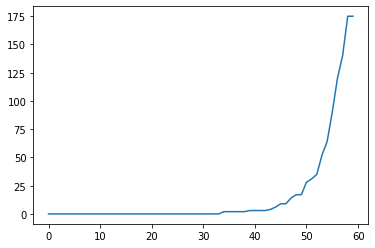

In [212]:
plt.plot(np.arange(len(ausdates)),WA[ausdates])
plt.show()

In [178]:
def my_exp2 (x, a, b):
    return (np.exp2(a*x + b))

In [195]:
def my_expon2 (x, loc, scale):
    return (np.exp2((x - loc)/scale)/scale)

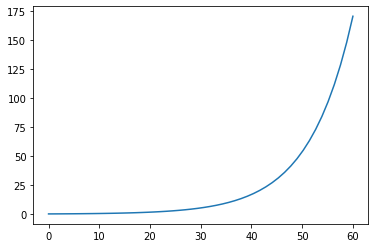

In [208]:
xs = np.linspace(0, 60)
ys = my_expon2(xs, 0, 6)
plt.plot(xs, ys)

Parameters: 28.381030183804306 3.279348838792511


<function matplotlib.pyplot.show(*args, **kw)>

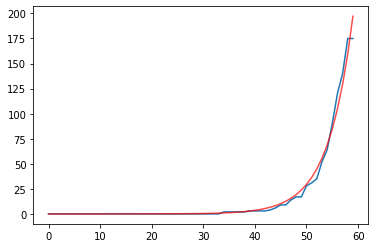

In [219]:
from scipy.optimize import curve_fit
numdays = len(ausdates)
days = np.arange(numdays)

plt.plot(days, WA[ausdates])

((scale, loc), covariance) = curve_fit(my_expon2, days, WA[ausdates])
optimised_guesses = my_expon2(days, scale, loc)
print("Parameters:", scale, loc)
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show


Parameters: 17.685952973991537 3.4982182266194752


<function matplotlib.pyplot.show(*args, **kw)>

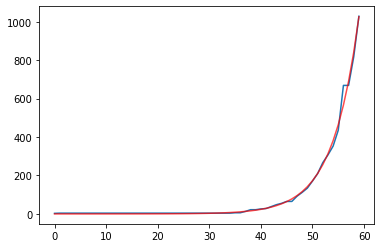

In [220]:
NSW = aus_covid[(aus_covid["State"] == "New South Wales")].squeeze()
plt.plot(days,NSW[ausdates])

((scale, loc), covariance) = curve_fit(my_expon2, days, NSW[ausdates])
optimised_guesses = my_expon2(days, scale, loc)
print("Parameters:", scale, loc)
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: 23.09388796063832 3.3506089988748906


<function matplotlib.pyplot.show(*args, **kw)>

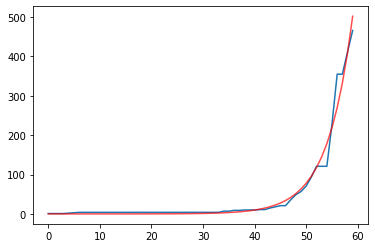

In [221]:
VIC = aus_covid[(aus_covid["State"] == "Victoria")].squeeze()
plt.plot(days,VIC[ausdates])

((scale, loc), covariance) = curve_fit(my_expon2, days, VIC[ausdates])
optimised_guesses = my_expon2(days, scale, loc)
print("Parameters:", scale, loc)
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -5.991324357444436 3.71310880824334


<function matplotlib.pyplot.show(*args, **kw)>

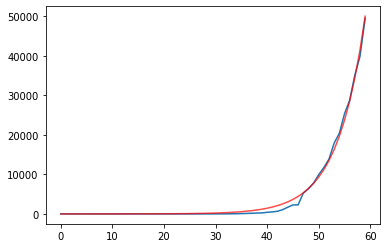

In [225]:
spain_covid = confirmed[confirmed["Country"] == "Spain"].squeeze()
plt.plot(days,spain_covid[ausdates])

((scale, loc), covariance) = curve_fit(my_expon2, days, spain_covid[ausdates])
optimised_guesses = my_expon2(days, scale, loc)
print("Parameters:", scale, loc)
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

In [133]:
new = []
for row in confirmed:
    
for x in confirmed.columns:
    print(x)

Province/State
Country/Region
Lat
Long
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20
3/19/20
3/20/20
3/21/20
3/22/20
3/23/20
3/24/20
3/25/20


### Extracting the Australian data

Let's start with some more practical column names:

In [ ]:
covid = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])
covid.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
             inplace=True)
covid.head()

In [ ]:
auscovid = covid[covid["Country"] == "Australia"]
auscovid

In [ ]:
auscovid.nlargest(1,"Confirmed")

> _Q: How would we ask which state has the smallest count of confirmed cases?_

## Data Exploration using Bar Plots

In [30]:
auscovid.loc[auscovid["State"] == "Western Australia"].plot.bar("Date","Confirmed")

NameError: name 'auscovid' is not defined

In [ ]:
WA = auscovid.loc[(auscovid["State"] == "Western Australia") & (auscovid["Confirmed"]>0)]
WA.head()

In [ ]:
WA.plot.bar("Date","Confirmed")
plt.show()

The date labels are not very readable. Rather than create our own strings 'manually', we can use `strftime` (STRing Format TIME"?)

Some python documentation is not very useful! https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html#pandas.Timestamp.strftime

Although we haven't used the `datetime` module, pandas Timestamp is designed to be compatible with datetime, and we can [find some documentation there](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

We can use pandas `apply` with a lambda function to format each date element:

In [ ]:
WA["Date"].apply(lambda x: x.strftime("%B %d")).head()

In [ ]:
ax = WA.plot.bar("Date","Confirmed")
xlabels = WA["Date"].apply(lambda x: x.strftime("%B %d"))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("Western Australian Covid-19 Confirmed Cases")
plt.show()

We are also interested in the number of recoveries. We could plot those separately, but by plotting them together, we can get an idea of the _proportion_ of recoveries so far.

Without arguments, Dataframe's plot function will try to plot all columns on the same graph:

In [ ]:
ax = WA.plot.bar()
plt.show()

To overcome this problem, we'll create a temporary dataframe by filtering out just those (numerical) columns that we want:

In [ ]:
WA_totals = WA.filter(["Confirmed", "Recovered", "Deaths"])
ax = WA_totals.plot.bar()
plt.show()

Let's try a different state with more data.

In [ ]:
NSW = auscovid.loc[(auscovid["State"] == "New South Wales") & (auscovid["Confirmed"]>0)]
NSW.tail(3)

In [ ]:
NSW_totals = NSW.filter(["Confirmed", "Recovered", "Deaths"])
ax = NSW_totals.plot.bar()
xlabels = NSW["Date"].apply(lambda x: x.strftime("%B %d"))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases")
plt.show()

In [ ]:
ax = NSW_totals.plot.bar(figsize=(10,2))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases")
plt.show()

It's getting too crowded to show by day. We could try showing by week.

Let's use a list comprehension to get the day names and pick out the sundays:

In [ ]:
[x.day_name() for x in NSW["Date"]][0:10]

In [ ]:
[x.day_name() == 'Sunday' for x in NSW["Date"]][0:10]

In [ ]:
NSW_sundays = NSW.loc[[x.day_name() == 'Sunday' for x in NSW["Date"]]]
NSW_totals = NSW_sundays.filter(["Confirmed", "Recovered", "Deaths"])
ax = NSW_totals.plot.bar(figsize=(6,4))
ax.set_xticklabels(NSW_sundays["Date"].apply(lambda x: x.strftime("%B %d")))
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases by Week")
plt.show()

We'd like to have a look at every state. Rather than "manually" coding for each state individually, we would like an efficient way to look at them all. 

Pandas provides a very useful class for just this kind of problem. It's called `GroupBy`.

## Using GroupBy

In [ ]:
states = auscovid.groupby("State")
states.tail(2)

A little more data cleaning...

In [ ]:
auscovid = covid.loc[(covid["Country"] == "Australia") & 
                     (covid["State"] != "From Diamond Princess")]
states = auscovid.groupby("State")
states.head(2)

In [ ]:
states.max()

We can now very efficiently answer our earlier question!

In [ ]:
states.max()["Confirmed"].idxmin()

In [ ]:
states.max().loc[states.max()["Confirmed"].idxmin()]

But hang on. Is the State still a field (column) or not?

This makes it look like it is:

In [ ]:
states.head(2)

But this suggests it's not - rather that it's an index:

In [ ]:
states.max()

Actually neither is quite right. Let's step back and have another look at GroupBy.

GroupBy can be a little confusing. The `head` example looks like it might consist of a new Dataframe with the rows grouped. But lets have a look...

In [ ]:
type(states)

In [ ]:
print(states)

In [ ]:
print(WA)

They are quite different. 

Methods like `head` and `max` create a _view_ on the GroupBy object. In many cases (including head and max) that view is returned as a dataframe.

In [ ]:
type(states.max())

So what's inside a GroupBy object? Perhaps the most revealing view is provided by the `groups` method which gives us a _dictionary_ view of the object:

In [ ]:
states.groups

It maps keys to an [`Index` object](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.Int64Index.html#pandas.Int64Index) (specifically an `Int64Index`, but no need to remember that name).

The states are the keys:

In [ ]:
states.groups.keys()

The Index in turn indexes the rows of the original dataframe.

In [ ]:
auscovid.loc[states.groups["Tasmania"][0]]

But we rarely need to dig into that level of detail! Methods are provided to access the data in the most commonly used ways - typically as dataframes.

In [ ]:
states.get_group("Tasmania").head(1)

So back to our question about the State as a column. We know it's stored in the GroupBy object as an key. Whenter it _appears_ as a column depends on whether the _method_ that creates the view includes it.

In the case of `get_group`, it doesn't (by default).

In [ ]:
states.get_group("Tasmania")

This can be changed using the `as_index` attribute.

In [ ]:
states2 = auscovid.groupby("State", as_index=False)
states2.get_group("Tasmania").head(1)

(Note that there appears to be a bug in the way GroupBy sets as_index and group_keys in the current version.)

### Plotting all states

Now that we're familiar with GroupBy, let's use it to plot the data for all the states. 

As usual there are a number of ways we could do this. And as is often the case, one of the simplest and best is to use an iterator. 

In [ ]:
for name, group in states:
    print(name)
    print(group.head(2),"\n")   

In [ ]:
for name, group in states:
    print(type(name))
    print(type(group))

In [ ]:
def weekly_barplot (statename, statedata):
    state_sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]
    state_totals = state_sundays.filter(["Confirmed", "Recovered", "Deaths"])
    ax = state_totals.plot.bar(figsize=(3,2))
    ax.set_xticklabels(state_sundays["Date"].apply(lambda x: x.strftime("%B %d")))
    plt.ylabel("Number of cases")
    plt.title(statename + " Covid-19 Cases by Week")
    plt.show()

In [ ]:
for name, group in states:
    weekly_barplot(name, group)

The ease of doing this shows the power of these data structures! 

However, it's a bit messy - we could make it cleaner using subplots.

Also, its a bit visually misleading because the scales are different. ACT and NSW look kind of the same though they are vastly different in scale.

We ought to make the y-axis consistent.

### Using subplots

> _Q: If we're going to use an iterator (loop) to generate the plots in a subplot, where must the figure reside?_

>_How will the loop know which subplot to use?_

>_If we use a function for the 'repeated bits', what must be passed to the function?_

Let's do it in parts then we'll put it all together.

We'll plot all states starting at the first confirmed Austrlian case.

In [ ]:
aus_first = auscovid[auscovid["Confirmed"] > 0]["Date"].min()
aus_first

In [ ]:
aus_nz = auscovid[auscovid["Date"] >= aus_first]
aus_nz.head(3)


In [ ]:
states = aus_nz.groupby("State")

In [ ]:
# Work out the size of the subplot, assuming two side by side in each row
numstates = len(states.groups)
numrows = int(round(np.ceil(numstates/2.0))) 

Why do we use ceil?

In [ ]:
# Set up reasonable sized subplots
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows)) # length of figure depends on number of rows

In [ ]:
# Iterate through the states, and pick out the right subplot
position = 0
for name, group in states:
    print(np.divmod(position,2))
    position = position + 1

In [ ]:
# Iterate through the states, and pick out the right subplot
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows)) # length of figure depends on number of rowsposition = 0
position = 0
for name, group in states:
    (row, col) = np.divmod(position,2)
    axs[row, col].set_title(name)
    position = position + 1
plt.show()

👍

Let's add some data...

In [ ]:
# Iterate through the states, and pick out the right subplot
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows)) # length of figure depends on number of rowsposition = 0
position = 0
for statename, statedata in states:
    (row, col) = np.divmod(position,2)
    
    state_sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]

    # Add each column to the plot 
    xs = np.arange(len(state_sundays))
    width = 0.3
    axs[row, col].bar(xs-width, state_sundays["Confirmed"], width)
    axs[row, col].bar(xs, state_sundays["Recovered"], width)
    axs[row, col].bar(xs+width, state_sundays["Deaths"],width)
    
    axs[row, col].set_title(statename)
    position = position + 1
plt.show()

We can deal with scale issue by sharing plotting on shared axes:

In [ ]:
# Iterate through the states, and pick out the right subplot
# Share axes to give common scale
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows), sharex='all', sharey='all') # length of figure depends on number of rowsposition = 0
position = 0
for statename, statedata in states:
    (row, col) = np.divmod(position,2)
    
    state_sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]

    # Add each column to the plot 
    xs = np.arange(len(state_sundays))
    width = 0.3
    axs[row, col].bar(xs-width, state_sundays["Confirmed"], width)
    axs[row, col].bar(xs, state_sundays["Recovered"], width)
    axs[row, col].bar(xs+width, state_sundays["Deaths"],width)
    
    axs[row, col].set_title(statename)
    position = position + 1
plt.show()

In [ ]:
# Full code, with all the bells and whistles

# Get data by state since first Australian occurrence
aus_first = auscovid[auscovid["Confirmed"] > 0]["Date"].min()
aus_nz = auscovid[auscovid["Date"] >= aus_first]
states = aus_nz.groupby("State")
numstates = len(states.groups)
numrows = int(round(np.ceil(numstates/2.0))) 

# Set up subplots and position 'pointer'
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows), sharex='all', sharey='all') # length of figure depends on number of rowsposition = 0
position = 0

# Iterate through each state/plot
for statename, statedata in states:
    (row, col) = np.divmod(position,2)
    position = position + 1
    
    # Extract sunday numbers
    state_sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]

    # Add each column to the plot 
    xs = np.arange(len(state_sundays))
    width = 0.3
    axs[row, col].bar(xs-width, state_sundays["Confirmed"], width, label="Confirmed")
    axs[row, col].bar(xs, state_sundays["Recovered"], width, label="Recovered")
    axs[row, col].bar(xs+width, state_sundays["Deaths"],width, label="Deaths")
    
    # Label individual plot
    axs[row, col].set_title(statename)
    axs[row, col].legend(loc='upper left')
    if row == numrows-1:
        axs[row, col].set_xlabel("Days since first Australian case")
    if col == 0:
        axs[row, col].set_ylabel("Number of cases")

# Set overall figure title and show figure
fig.suptitle("Total Weekly Australian Covid-19 Cases by State")
fig.subplots_adjust(top=0.94) # cludge to get suptitle at the right height
plt.show()

We've answered the first two questions. Let's use a function to make it cleaner.

More importantly, notice that most of what is in the loop is independent of the specific country. _Can we make a function that will work for any country without writing it all again?_

In [ ]:
def weekly_barsubplot (statename, statedata, axis):
    sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]
    numbers = sundays.filter(["Confirmed", "Recovered", "Deaths"])
    axis.bar(np.arange(len(sundays)), numbers)
    axis.set_xticklabels(sundays["Date"].apply(lambda x: x.strftime("%B %d")))
    plt.ylabel("Number of cases")
    plt.title(statename + " Covid-19 Cases by Week")
    plt.show()

Alternatively we can use `apply` to apply a function to the whole GroupBy object, one dataframe at a time.

Unfortunately its a little messy:
* We need the function to access the state name, but GroupBy by default strips this out and uses it as an index to the rest of the data.
* Apply only applies to the remaining data.
* You could be mistaken for thinking this is not the case, since some methods, like `head`, `max` above, print the index value as if it were the "State" field.
* Note that `get_group`, however, does not!

Yuck.

However there is a fix. Setting `as_index` to false maintains the column (in an 'SQL-style' output). Counterintuitively it _does_ still use the column as the index (

In [ ]:
def weekly_barplot2 (statedata):
    print(statedata.index)
#    state = statedata["State"].iat[0]
    sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]
    numbers = sundays.filter(["Confirmed", "Recovered", "Deaths"])
    ax = numbers.plot.bar(figsize=(3,2))
    ax.set_xticklabels(sundays["Date"].apply(lambda x: x.strftime("%B %d")))
    plt.ylabel("Number of cases")
    plt.title(state + " Covid-19 Cases by Week")
    plt.show()

In [ ]:
states.apply(weekly_barplot2)

In [ ]:
states.head(2)

## Curve Fitting and Optimisation

Are WA's infections really increasing exponentially? 

Don't believe the press! Let's find out for ourselves.

In [ ]:
WA.tail()

In [ ]:
len(WA)

In [ ]:
plt.plot(np.arange(len(WA)),WA["Confirmed"])
plt.show()

In [ ]:
xs = np.arange(len(WA))
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)
plt.plot(xs, guesses)
plt.show()

In [ ]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)/2000
plt.plot(xs, guesses)
plt.show()

In [ ]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

In [ ]:
plt.plot(xs,WA["Confirmed"])
guesses = 2 + np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

Pretty close!!

But lets get the computer to do the work of finding the best match.

First, we need to decide what form the function we want try and match to the data will take, and what _parameters_ we will vary.

We'll define a function of the form `a + b * 2^(cx)`.
As demonstrated above:
* `a` "shifts" the function in the y direction
* `b` "scales" (stretches or shrinks) the function
* `c` determines the "steepness" of the function


In [ ]:
def my_exp (x, a, b, c):
    return (a + b * np.exp2(x/c))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
curve_fit(my_exp, xs, WA["Confirmed"])

Lets capture the parameters. 

Remember our guesses were 2, 0.1, and 0.5. How did we compare?

In [ ]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])
(a, b, c)

In [ ]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])

plt.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
plt.plot(xs, optimised_guesses)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
ax.plot(xs, optimised_guesses)
daynums = np.arange(0, len(xs), 2)
ax.set_xticks(daynums)
ax.set_xlabel("Days since first recorded infection in WA")
ax.set_ylabel("Number of confirmed infections")
ax.set_title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

For interest, lets include all the data (the exponential function tends to zero as x tends to minus infinity, so we don't expect the fit to change much).

In [ ]:
WA_all = auscovid.loc[(auscovid["State"] == "Western Australia")]
WA_all.head()

In [ ]:
xs = np.arange(len(WA_all))
((a, b, c), covariance) = curve_fit(my_exp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

In [ ]:
xs = np.arange(len(WA_all))
cases = WA_all["Confirmed"] < 1
print(np.int8(cases))
std = 10 * np.int8(cases) + 1
init = [0, ]

((a, b, c), covariance) = curve_fit(my_exp, xs, WA_all["Confirmed"], sigma=std)
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

Which one are the press likely to use??

Notice that by starting at zero, the "vertical shift" of the first parameter is not really needed. 

Lets see if we can remove the first parameter and still get a good fit.

In [ ]:
def my_zexp (x, b, c):
    return (b * np.exp2(x/c))

In [ ]:
((b, c), covariance) = curve_fit(my_zexp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

We also call these parameters _independent variables_ (we can set them independently of each other) and we call the number of independent variables the _degrees of freedom_.

`my_exp` has 3 degrees of freedom, while `my_zexp` has only 2 degrees of freedom.

Generally we like to use as _few degrees of freedom as we can_ to fit the data, so that we can understand the general trend of the data.

Fitting a function with too many degrees of freedom often results in _over-fitting_, and describes the (random) variability in the data rather than the general trend.

You will meet these concepts again in the __Statistical Learning__ unit!

## GroupBy

In [ ]:
combined = auscovid.groupby("Date", as_index=False)
aus_nz = auscovid[auscovid["Confirmed"]>0]
aus_combined_nz = aus_nz.groupby("Date", as_index=False)

In [ ]:
combined.sum().tail()

In [ ]:
combined.sum().plot.bar("Date","Confirmed")

In [ ]:
xs = np.arange(len(combined))
((b, c), covariance) = curve_fit(my_zexp, xs, combined.sum()["Confirmed"])
plt.plot(xs,combined.sum()["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are Australia's Infections Really Increasing Exponentially?")
plt.show()

In [ ]:
xs = np.arange(len(aus_combined_nz))
((b, c), covariance) = curve_fit(my_zexp, xs, aus_combined_nz.sum()["Confirmed"])
plt.plot(xs,aus_combined_nz.sum()["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Are Australia's Infections Really Increasing Exponentially?")
plt.show()

## Country Comparisons

In [ ]:
def my_exp2 (x, a, b):
    return (np.exp2(a*x + b))

In [ ]:
def country_plot (country, status="Confirmed", fit_exp=False, limit = np.inf):
    country_data = covid[covid["Country"] == country]
    if not country_data["State"].isin([""]).all():
        print("Warning: country data could be divided over regions")
    country_nonzero = country_data[(country_data[status] > 0) & (country_data[status] < limit)]
#    print(country_nonzero.max())
    xs = np.arange(len(country_nonzero))
    plt.plot(xs,country_nonzero[status], color='blue')

    if fit_exp:
        ((b, c), covariance) = curve_fit(my_exp2, xs, country_nonzero[status])
        optimised_guesses = my_exp2(xs, b, c)
        print("Parameters:", b, c)
        plt.plot(xs, optimised_guesses, alpha=0.7, color='red')

    plt.xlabel("Days since first recorded case")
    plt.ylabel("Number "+status)
    plt.title(country)
    plt.show()
    

In [ ]:
def country_plot2 (country, statuses=["Confirmed","Deaths"], fit_exp=False, limit = np.inf):
    country_data = covid[covid["Country"] == country]
    country_combined = country_data.groupby("Date").sum()
    country_nonzero = country_combined[(country_combined["Confirmed"] > 0) & 
                                       (country_combined["Confirmed"] < limit)]

    xs = np.arange(len(country_nonzero))
    for status in statuses:
        plt.plot(xs,country_nonzero[status])

        if fit_exp:
            ((b, c), covariance) = curve_fit(my_exp2, xs, country_nonzero[status])
            optimised_guesses = my_exp2(xs, b, c)
            print("Parameters:", b, c)
            plt.plot(xs, optimised_guesses, alpha=0.7, color='gray')

    plt.xlabel("Days since first recorded case")
    plt.ylabel("Number "+status)
    plt.title(country)
    plt.show()
    

### Italy

In [ ]:
italy_covid = covid[covid["Country"] == "Italy"]
italy_covid.tail()

In [ ]:
country_plot2("Italy", statuses=["Confirmed","Deaths"], fit_exp=True)

In [ ]:
country_plot2("Australia", fit_exp=True)

In [ ]:
country_plot2("France", fit_exp=True)

In [ ]:
country_plot2("China", fit_exp=False)

In [ ]:
covid[covid["Country"].between("Ko", "Kp")]
country_plot2("Korea, South", fit_exp=True)

In [ ]:
italy_comparative = italycovid[(italycovid["Confirmed"]<1500) & (italycovid["Confirmed"]>0)]
italy_comparative.tail()

In [ ]:
plt.plot(np.arange(len(italy_comparative)),italy_comparative["Confirmed"])
plt.show()

In [ ]:
xs = np.arange(len(italy_comparative))
((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
plt.plot(xs,italy_nz["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

In [ ]:
xs = np.arange(len(italycovid))
plt.plot(xs,italycovid["Confirmed"], color='blue')
#((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
#optimised_guesses = my_zexp(xs, b, c)
#print("Parameters:", b, c)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

## Spain

In [ ]:
overall_plot("Spain", fitexp=True, limit=1600)
overall_plot("Italy", fitexp=True, limit=1400)
overall_plot("Singapore")
overall_plot("South Korea")
overall_plot("China")

In [ ]:
spain_covid = covid[covid["Country"] == "Spain"]
spain_covid.tail(20)



In [ ]:
france_covid = covid.loc[covid["Country"] == "France"]
france_covid.head()

In [ ]:
france_covid["State"].isin([""])

In [ ]:
spain_covid = covid.loc[covid["Country"] == "Spain"]
spain_covid.tail()

In [ ]:
xs = np.arange(len(spain_covid))
plt.plot(xs,italycovid["Confirmed"], color='blue')
#((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
#optimised_guesses = my_zexp(xs, b, c)
#print("Parameters:", b, c)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

In [ ]:
italy_nz.plot.bar(["Confirmed"])

In [ ]:
import json
with open("datapackage.json",'r') as file:
    di = json.load(file)
di

In [ ]:
data = pd.read_csv("time-series-19-covid-combined.csv", converters=di)
data


In [ ]:
for datum in data.iloc[1]:
    print(type(datum))

In [ ]:
import datapackage


In [ ]:
j = pd.read_json("datapackage.json")
j.head()

In [ ]:
mytypes = {"Province/State": str, "Country/Region": str,
           "Lat": np.float64, "Long": np.float64,
           "Date": str, 
           "Confirmed": np.int64, "Recovered": np.int64, "Deaths": np.int64}
data = pd.read_csv("time-series-19-covid-combined.csv", dtype=mytypes, na_filter=False)
data

In [ ]:
for datum in data.iloc[1]:
    print(type(datum))

In [ ]:
type(data["Date"])

In [ ]:
data["Date"].dtypes


In [ ]:
data.infer_objects()